In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import multivariate_normal as mvn
from jax import config

from runner import (
    run_vsem_experiment, 
    plot_coverage,
    plot_coverage_single_rep,
)

import vsem_jax as vsem
from vsem_inv_prob import (
    InvProb, 
    VSEMPrior, 
    VSEMLikelihood,
    VSEMTest
)

import sys
sys.path.append("./../linear_Gaussian/")
from Gaussian import Gaussian

sys.path.append("./../../helpers/")
from mcmc_uncertainty_prop import gpjaxGP, RandomKernelPCNSampler

config.update("jax_enable_x64", True)


/opt/miniconda3/envs/modmcmc-dev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## VSEM Experiment 1

In [3]:
rng = np.random.default_rng(6435)
n_design = 15
n_reps = 6

tests, metrics, failed = run_vsem_experiment(rng, n_design, n_reps)

Replication 1
Optimization terminated successfully.
         Current function value: 62.814585
         Iterations: 77
         Function evaluations: 86
         Gradient evaluations: 86
Replication 2


/opt/miniconda3/envs/modmcmc-dev/lib/python3.13/site-packages/scipy/optimize/_minimize.py:780: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 77.933576
         Iterations: 101
         Function evaluations: 157
         Gradient evaluations: 146


/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:504: RuntimeWarning: divide by zero encountered in log
  return np.log(ep_approx)
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:1108: RuntimeWarning: invalid value encountered in multiply
  integrand = p * (logp - logq)


Replication 3


/opt/miniconda3/envs/modmcmc-dev/lib/python3.13/site-packages/scipy/optimize/_minimize.py:780: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 66.016805
         Iterations: 93
         Function evaluations: 186
         Gradient evaluations: 173


/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:504: RuntimeWarning: divide by zero encountered in log
  return np.log(ep_approx)
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:1108: RuntimeWarning: invalid value encountered in multiply
  integrand = p * (logp - logq)


Replication 4
Optimization terminated successfully.
         Current function value: 66.751146
         Iterations: 76
         Function evaluations: 83
         Gradient evaluations: 83
Replication 5


/opt/miniconda3/envs/modmcmc-dev/lib/python3.13/site-packages/scipy/optimize/_minimize.py:780: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 49.608906
         Iterations: 79
         Function evaluations: 121
         Gradient evaluations: 109
Replication 6


/opt/miniconda3/envs/modmcmc-dev/lib/python3.13/site-packages/scipy/optimize/_minimize.py:780: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 59.460263
         Iterations: 99
         Function evaluations: 134
         Gradient evaluations: 125
Number of failed iterations: 0


/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:504: RuntimeWarning: divide by zero encountered in log
  return np.log(ep_approx)
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:1108: RuntimeWarning: invalid value encountered in multiply
  integrand = p * (logp - logq)


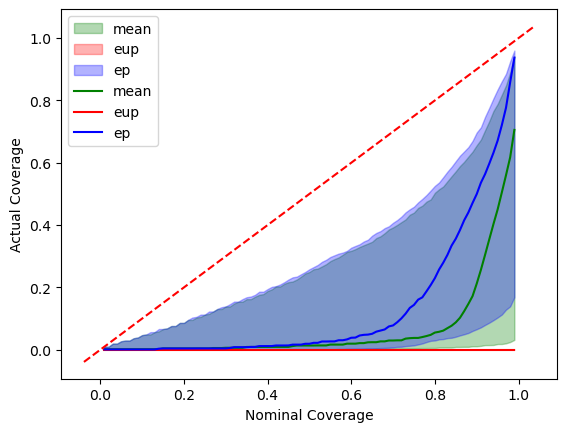

In [4]:
fig, ax = plot_coverage(tests, metrics)
display(fig)

### Looking at one of the replicates

In [17]:
rep_idx = 0

test = tests[rep_idx]
metric = metrics[rep_idx]
inv_prob = test.inv_prob

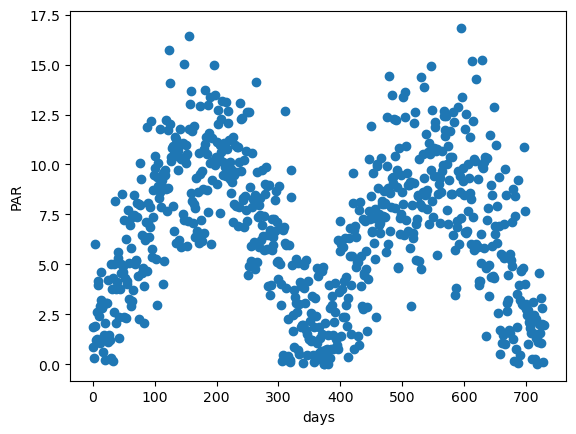

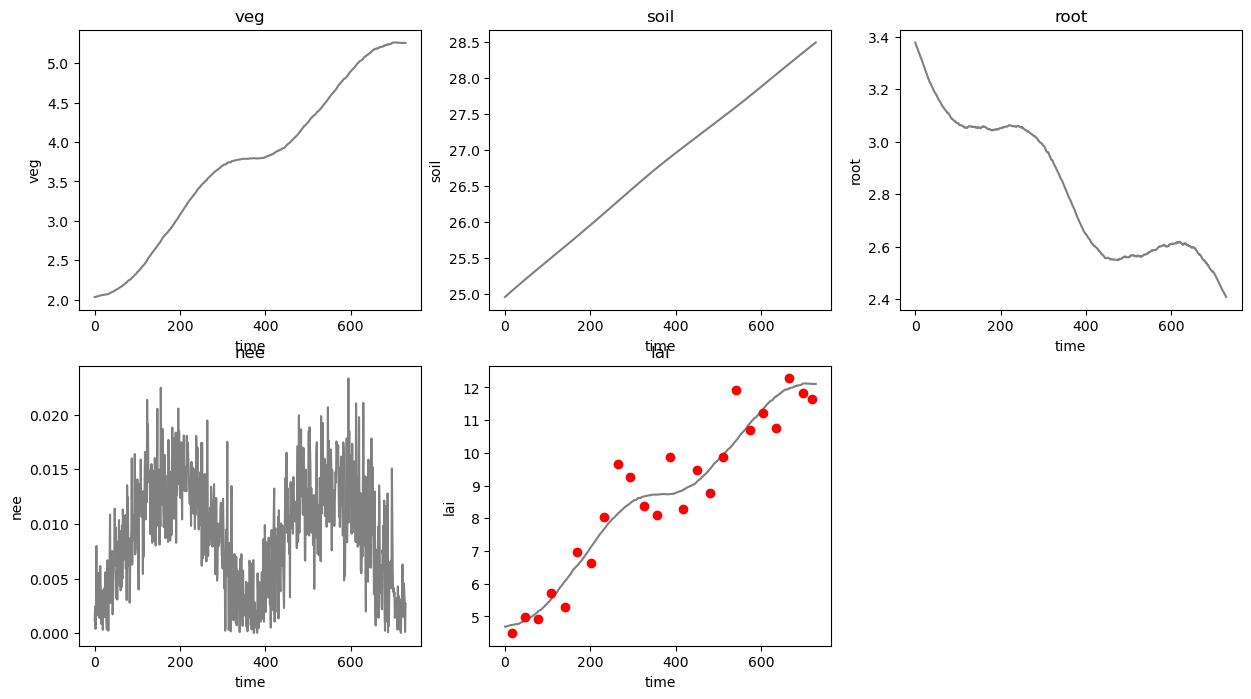

In [ ]:
inv_prob.likelihood.plot_driver()
inv_prob.likelihood.plot_ground_truth()
plt.close()

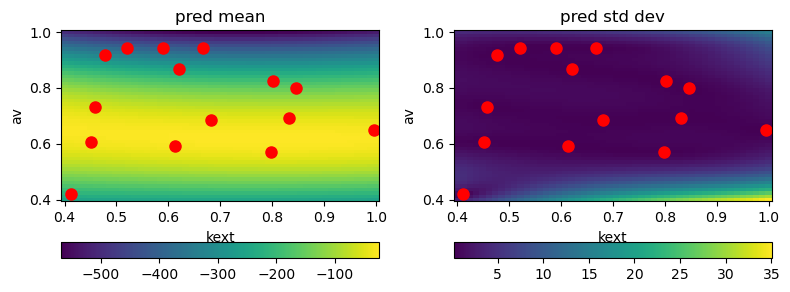

In [7]:
# GP predictions

fig_gp, axs_gp = test.plot_gp_pred(conditional=True, pred_type='pred', markersize=8)
display(fig_gp)
plt.close()

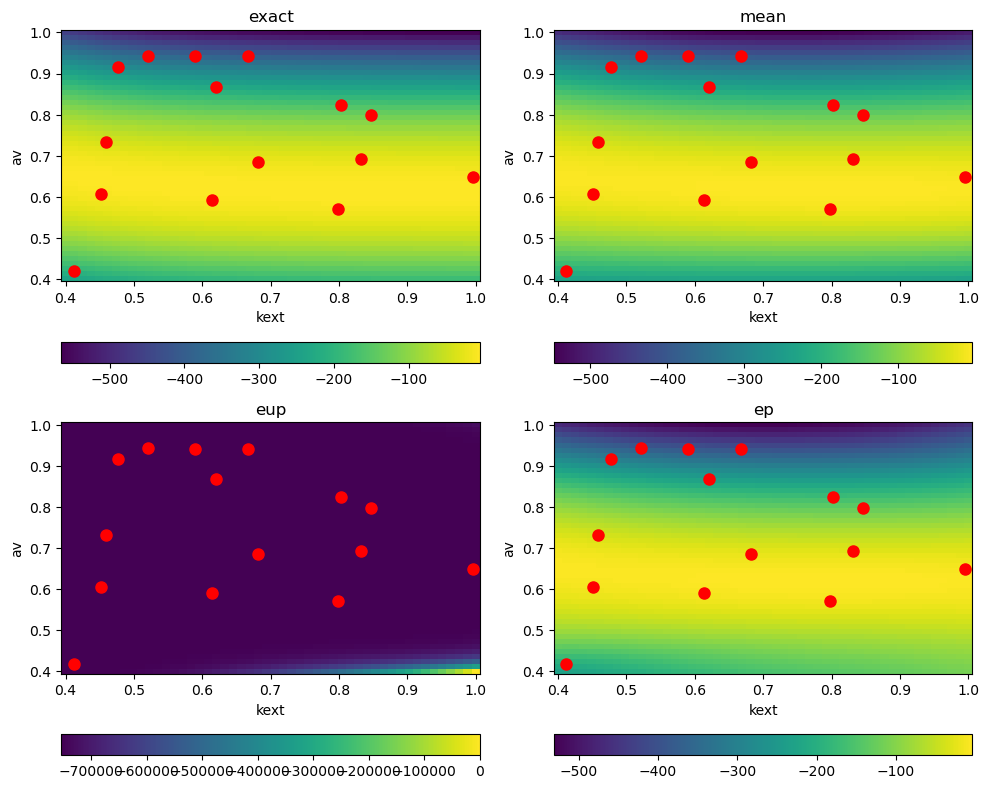

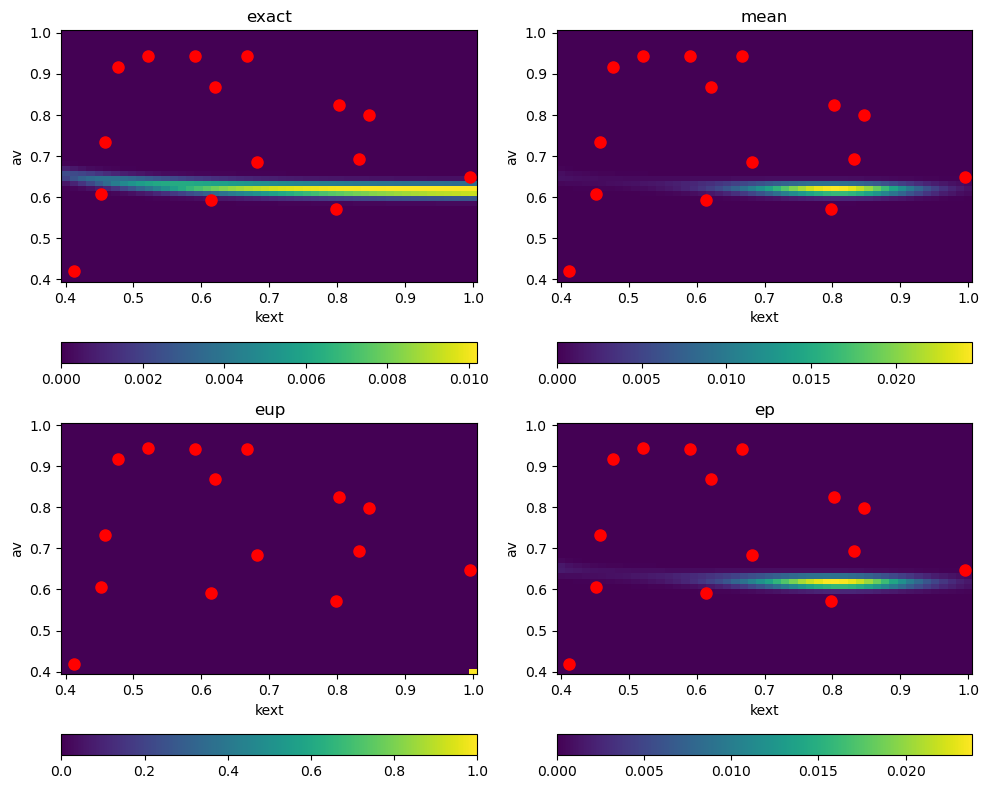

In [8]:
# Comparing posteriors
fig_log, axs_log = test.plot_posterior_comparison(shared_scale=False, log_scale=True,
                                                  pred_type='pred', nrows=2, figsize=(10,8))
fig, axs = test.plot_posterior_comparison(shared_scale=False, log_scale=False, 
                                          pred_type='pred', nrows=2, figsize=(10,8))

display(fig_log)
display(fig)
plt.close()

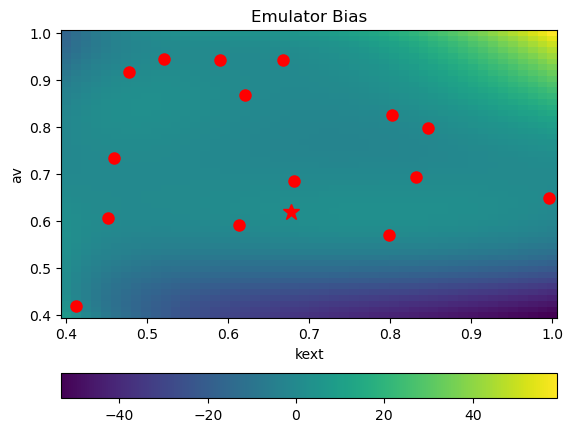

In [10]:
# Surrogate bias 

fig_bias, ax_bias = test.plot_gp_bias(conditional=True, pred_type='pred')

display(fig_bias)
plt.close()

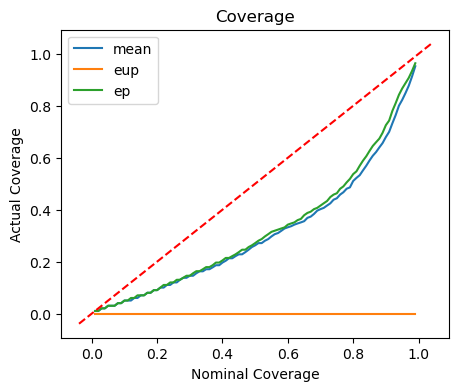

In [ ]:
# Coverage plot

coverage_list = metric['coverage']
alphas = metric['alphas']

fig = plot_coverage_single_rep(alphas, coverage_list, labels=['mean', 'eup', 'ep'])
display(fig)

NameError: name 'likelihood' is not defined

In [ ]:
inv_prob.reset_sampler()
samp, trace_plot = inv_prob.sample_posterior(n_step=20000)

display(trace_plot)

In [ ]:
plt.hist2d(samp[:,0], samp[:,1], bins=30, cmap='Blues')
plt.plot(*likelihood.par_true, "*", color="red", markersize=12)
plt.colorbar(label='Counts per bin')
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Exact posterior')
plt.show()

In [ ]:
fig_exact, ax_exact = vsem_test.plot_exact_log_post()
fig_gp_post, ax_gp_post = vsem_test.plot_gp_pred(conditional=True, latent_pred=True, figsize=(10,5))
fig_comparison, ax_comparison = vsem_test.plot_true_vs_gp_mean(conditional=True, latent_pred=True, figsize=(10,5))

fig_comparison.subplots_adjust(bottom=0.3)
display(fig_gp_post)
display(fig_comparison)

In [ ]:
log_dens_obs = lambda pred_obs: vsem_test.inv_prob.likelihood._likelihood_rv.log_p(pred_obs)
gpwrapped = gpjaxGP(vsem_test.gp_posterior, vsem_test.design, rng)
u_init = vsem_test.inv_prob.prior.sample()

rkpcn = RandomKernelPCNSampler(log_density=log_dens_obs,
                               gp=gpwrapped,
                               u_init=u_init,
                               u_prop_cov=proposal_cov,
                               pcn_cor=0.99,
                               rng=rng)

In [ ]:
rkpcn.sample(num_steps=100)

In [ ]:
n_samp = len(rkpcn.trace)
u_samp = np.empty((n_samp, prior.dim))
fu_samp = np.empty(n_samp)

for i, state in enumerate(rkpcn.trace):
    u_samp[i] = state.primary['u']
    fu_samp[i] = state.primary['fu'].squeeze()